<a href="https://colab.research.google.com/github/theimgclist/PracticeGround/blob/master/Food101/Food101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Started working on  Fellowship.ai challenge:


Food-101 is a challenging vision problem, but everyone can relate to it.  Recent SoTA is ~80% top-1, 90% top-5.  These approaches rely on lots of TTA, large networks and  even novel architectures.

Train a decent model >85% accuracy for top-1 for the test set, using a ResNet50 or smaller network with a reasonable set of augmentations. 

### Google Colab has it's own shortcuts. Press Ctrl + M + H to open Shortcut Window and assign your own shortcuts!

### I will start with knowingthe data - [Food 101](https://www.vision.ee.ethz.ch/datasets_extra/food-101/)
* This dataset has 101000 images in total. It's a food dataset with 101 categories.
* Each type of food has 750 training samples and 250 test samples
* Copy Pasting something interesting from the dataset's webpage :
***On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.***  
* The entire dataset is 5GB in size

### This is a computer vision - image classification problem. Like Cats vs Dogs classification, in this problem there are 101 classes

In [0]:
# I created a text cell above. Any code cells I am creating are being created as a sub portion of the above text cell and I am trying hard to find a way to avoid that
# Note - Once you created a section text cell, all the code cells below will be hidden/shown as part of the section
# I am not able to create a code section outside the text section
# If I have to come out of the text section, then I should create another Text Section and get a new code cell
# Update - Not using # at the beginning of text cell, will avoid cell grouping

### Downloading the 5GB dataset here on Colab

In [0]:
import os
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    #!tar xzvf food-101.tar.gz
    print("Extraction done!")


  

In [3]:
#!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2019-01-31 09:24:08--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2019-01-31 09:24:09--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  2.62MB/s    in 28m 59s 

2019-01-31 09:53:08 (2.74 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [17]:
get_data_extract()

Dataset already exists


In [0]:
#extract_data()

In [5]:
# Extract the downloaded dataset
#!tar xzvf food-101.tar.gz  -> added to get_data_extract method

food-101/
food-101/images/
food-101/images/beignets/
food-101/images/beignets/2885220.jpg
food-101/images/beignets/1814040.jpg
food-101/images/beignets/81202.jpg
food-101/images/beignets/1827892.jpg
food-101/images/beignets/2802124.jpg
food-101/images/beignets/2192983.jpg
food-101/images/beignets/250043.jpg
food-101/images/beignets/2786548.jpg
food-101/images/beignets/445116.jpg
food-101/images/beignets/3661460.jpg
food-101/images/beignets/1064858.jpg
food-101/images/beignets/2993714.jpg
food-101/images/beignets/2936669.jpg
food-101/images/beignets/1062952.jpg
food-101/images/beignets/2869806.jpg
food-101/images/beignets/178659.jpg
food-101/images/beignets/1261083.jpg
food-101/images/beignets/1296128.jpg
food-101/images/beignets/3157161.jpg
food-101/images/beignets/646871.jpg
food-101/images/beignets/3438314.jpg
food-101/images/beignets/3019700.jpg
food-101/images/beignets/1133765.jpg
food-101/images/beignets/1199143.jpg
food-101/images/beignets/287665.jpg
food-101/images/beignets/3452

The download rate is currently 2.96MB/s(2.55pm IST). It used to be much faster on Colab!!  
Since Colab gets reset after several hours, when running the code after a while, I should check if the downloaded data still exists.
Check if the folder exists in /content, if not then go for !wget
Update - Download took 30mins
Extraction took 3.28pm to 3.37pm

In [23]:
!ls

food-101  food-101.tar.gz  sample_data


In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import os

import numpy as np


Using TensorFlow backend.


In [32]:
data_dir = "food-101/images/"
!ls food-101/images/

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [21]:
!pwd

/content


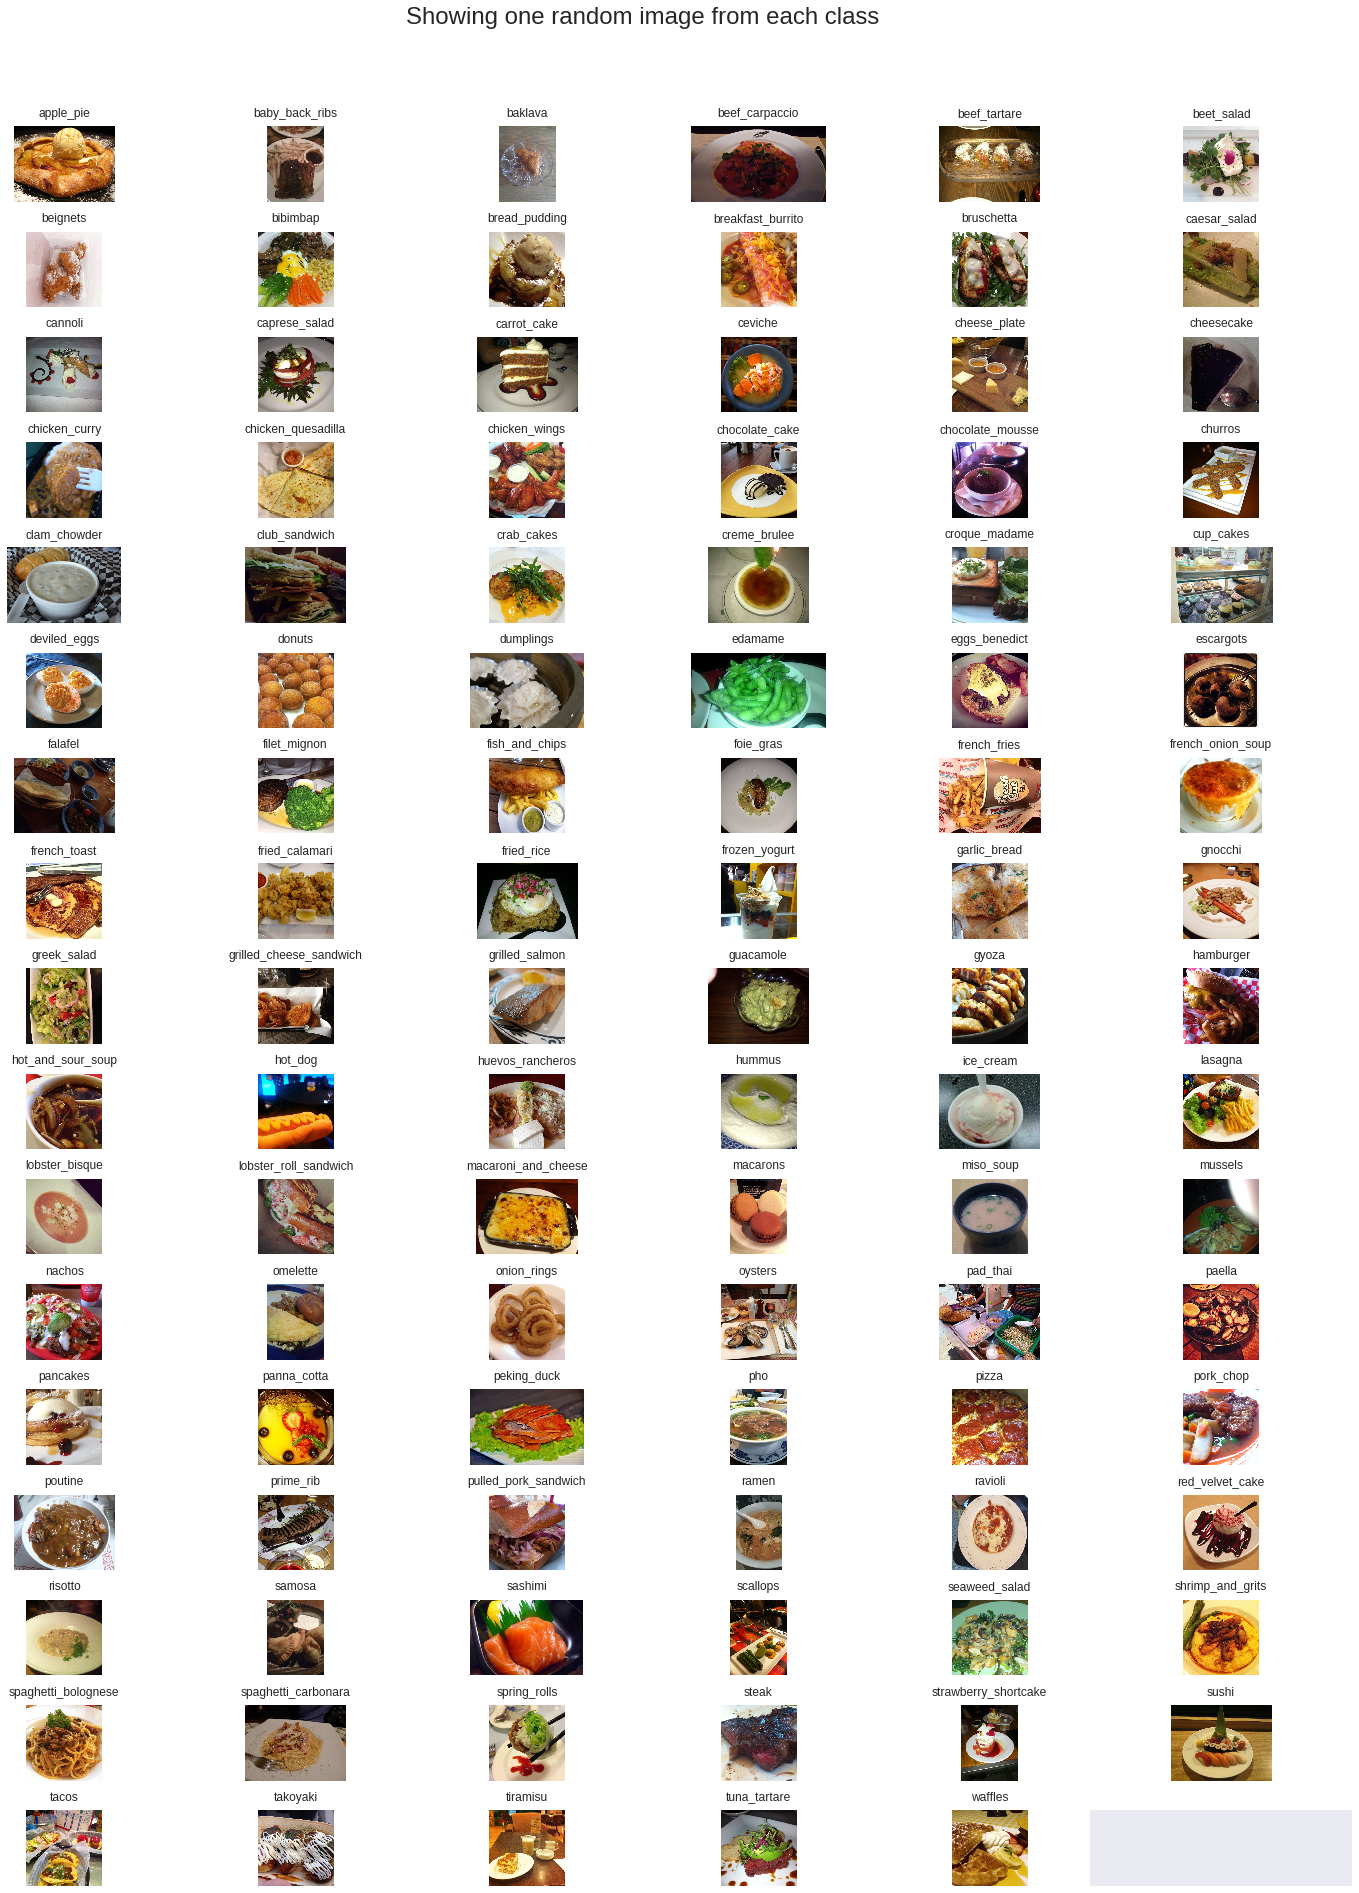

In [67]:
data_dir = "food-101/images/"
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(20,25))

fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] # as i an j values vary, i * cols + 1 varies from 0 till 101
      food_id += 1
    except:
      #print("Showed one image per food chosen at random for a total of 101 variety of foods..")
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    #ax.set_xticks([])
    #ax.set_yticks([])
#plt.axis('off')
plt.setp(ax, xticks=[],yticks=[])
#ax.set_title('Title', pad=20) to set gap between plot and its title
# plt.suptitle('Amazing Stats', size=16, y=1.12)  -> another way
plt.tight_layout()


# suptitle is overlapping with axes
# The reason tight_layout() doesn't help in this case is because tight_layout() does not take fig.suptitle() into account. OR - Stackoverflow

# tight_layout() only considers ticklabels, axis labels, and titles. Thus, other artists may be clipped and also may overlap. -OR StackOVerflow
# https://matplotlib.org/users/tight_layout_guide.html


TypeError: ignored

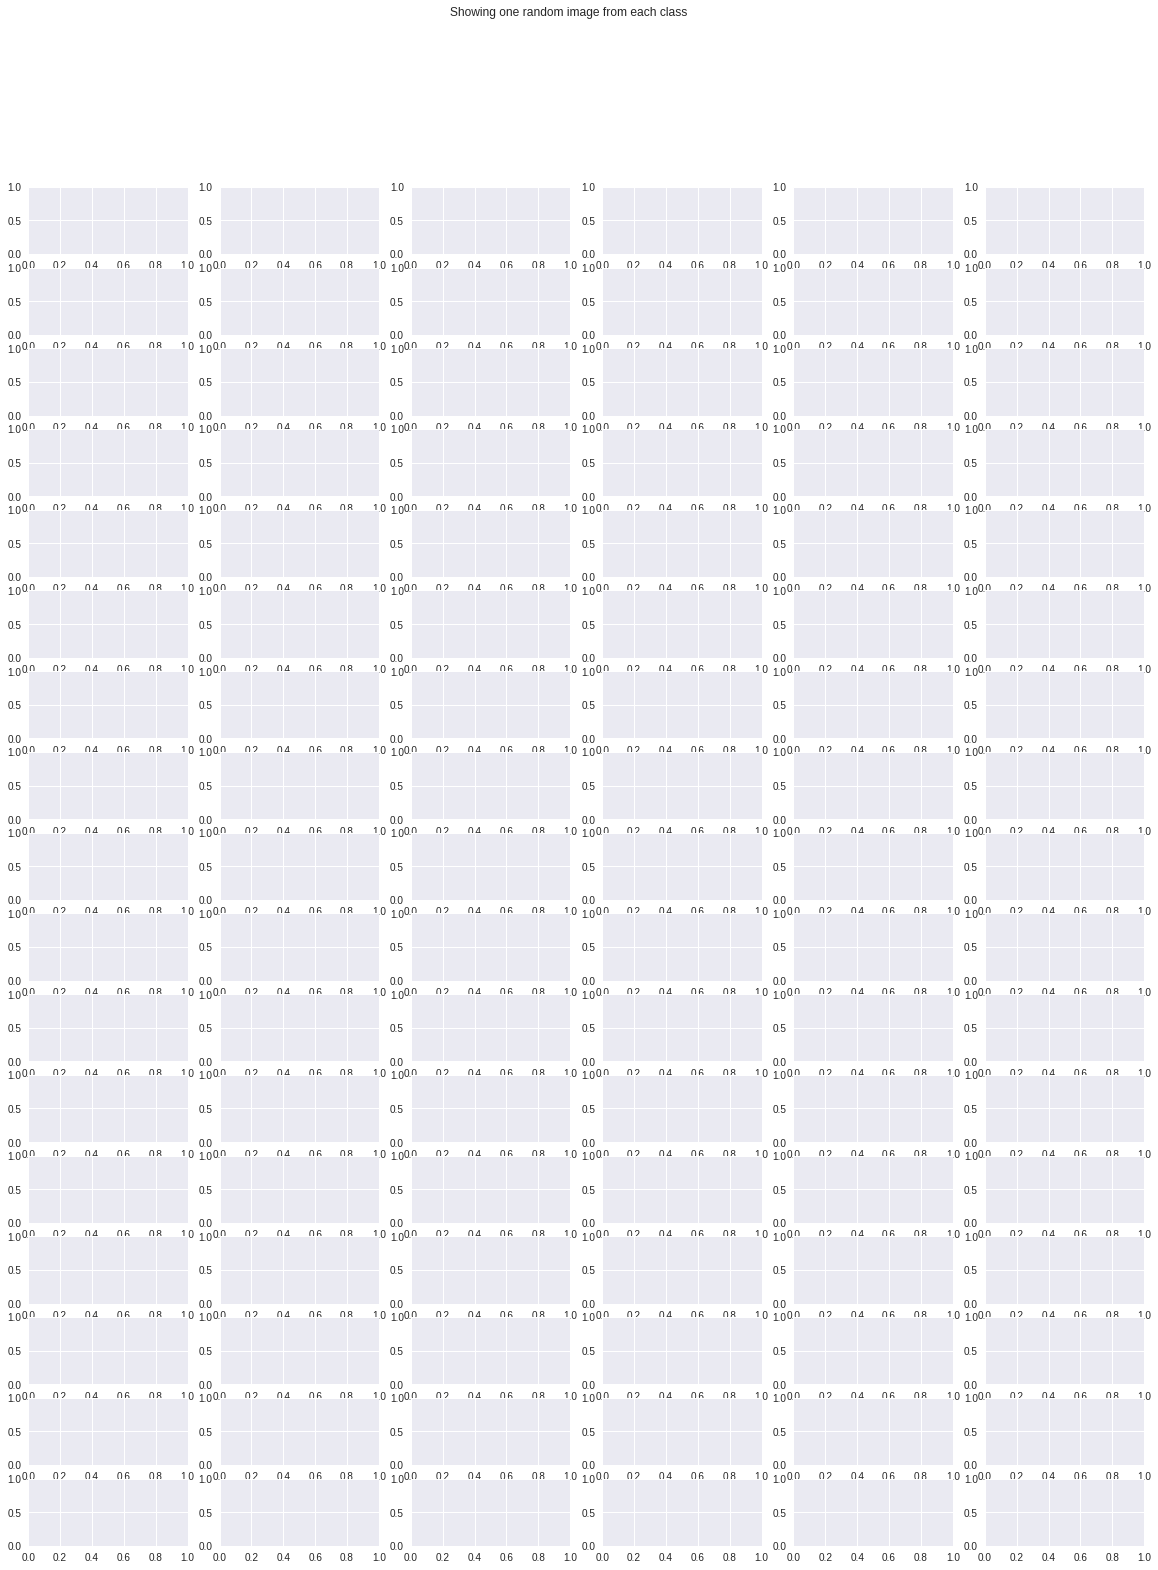

In [61]:
data_dir = "food-101/images/"
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(20,25))

fig.suptitle("Showing one random image from each class")
#foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
#plt.xticks([], [])
#plt.axis('off')
plt.setp(ax,xticks=[],yticks=[])